In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import re
from scipy.stats import linregress

# To plot maps
import hvplot.pandas

In [130]:
# Read the database
df = pd.read_csv('../Crime_Data_from_2020_to_Present.csv')
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
# Check number of crimes in dataset
number_crimes = len(df['DR_NO'])
number_crimes

820599

In [4]:
# Lets check quickly how it looks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820599 entries, 0 to 820598
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           820599 non-null  int64  
 1   Date Rptd       820599 non-null  object 
 2   DATE OCC        820599 non-null  object 
 3   TIME OCC        820599 non-null  int64  
 4   AREA            820599 non-null  int64  
 5   AREA NAME       820599 non-null  object 
 6   Rpt Dist No     820599 non-null  int64  
 7   Part 1-2        820599 non-null  int64  
 8   Crm Cd          820599 non-null  int64  
 9   Crm Cd Desc     820599 non-null  object 
 10  Mocodes         707114 non-null  object 
 11  Vict Age        820599 non-null  int64  
 12  Vict Sex        712653 non-null  object 
 13  Vict Descent    712645 non-null  object 
 14  Premis Cd       820589 non-null  float64
 15  Premis Desc     820116 non-null  object 
 16  Weapon Used Cd  286078 non-null  float64
 17  Weapon Des

# 1. What are the specific profiles that are most vulnerable to be victims of a crime? (sex, age, race)
### a) Profiles most vulnerable by Sex


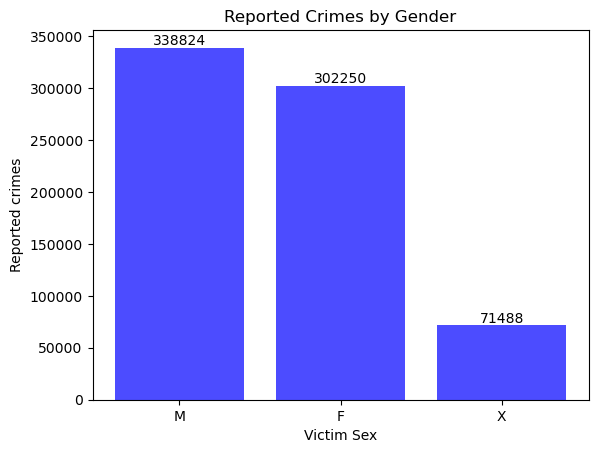

In [5]:
# According to the database documentation we only have 3 possible type of Sex: M - Male, F - Female, X - Unkown
sex_to_keep = ['M','F','X']
sex_df = df[df["Vict Sex"].isin(sex_to_keep)]
sex = sex_df["Vict Sex"].value_counts()

# Plot Reported Crimes by Gender
gender_plot = plt.bar(sex.index,sex.values, color = "blue", alpha=0.7)
plt.title('Reported Crimes by Gender')
plt.xlabel('Victim Sex')
plt.ylabel('Reported crimes')
plt.bar_label(gender_plot)

# Save the graph to a PDF file
pdf_filename = 'CrimesByGender.pdf'
pdf_filepath = '../Outputs/' + pdf_filename
plt.savefig(pdf_filepath, format='pdf')

plt.show()

### b) Profiles most vulnerable by Age

In [10]:
# Check age quantities
df['Vict Age'].value_counts().sort_index()

Vict Age
-3           1
-2          13
-1          56
 0      202527
 2         361
         ...  
 96         84
 97         61
 98         64
 99        305
 120         1
Name: count, Length: 103, dtype: int64

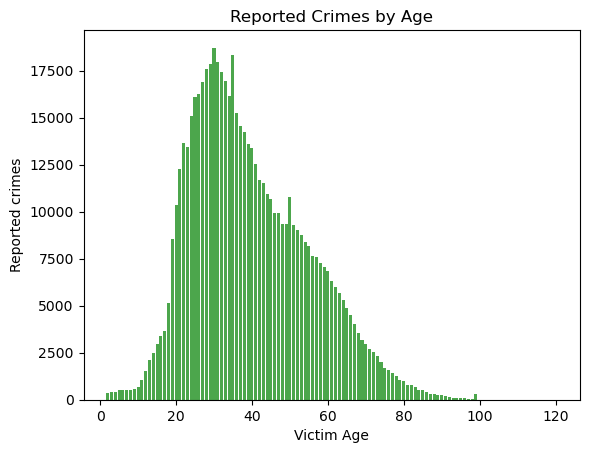

In [11]:
# We only take ages more than 0
Age_df= df[df['Vict Age'] > 0]
Age = Age_df["Vict Age"].value_counts()

# Plot Reported Crimes by Age
plt.bar(Age.index, Age.values, color = "green", alpha=0.7)
plt.title('Reported Crimes by Age')
plt.xlabel('Victim Age')
plt.ylabel('Reported crimes')

# Save the graph to a PDF file
pdf_filename = 'CrimesByAge.pdf'
pdf_filepath = '../Outputs/' + pdf_filename
plt.savefig(pdf_filepath, format='pdf')

plt.show()

### c) Profiles most vulnerable by Race

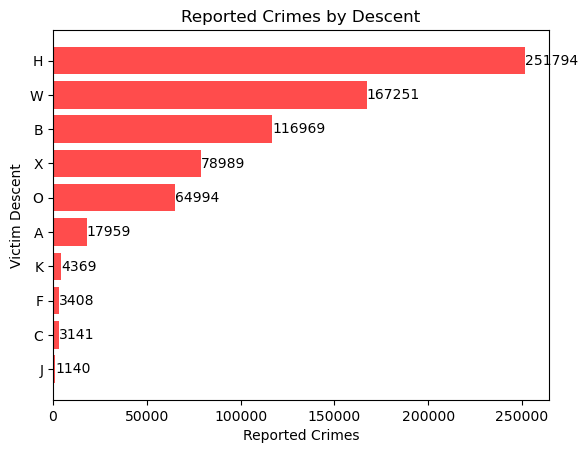

In [26]:
# Find the most popular race of victims (top ten)
Descent = df["Vict Descent"].value_counts().sort_values().tail(10)

# Plot Reported Crimes by Victim Descent (Race)
race_plot = plt.barh(Descent.index, Descent.values, color = "red", alpha=0.7)
plt.title('Reported Crimes by Descent')
plt.xlabel('Reported Crimes')
plt.ylabel('Victim Descent')
plt.bar_label(race_plot)

# Save the graph to a PDF file
pdf_filename = 'CrimesByDescent.pdf'
pdf_filepath = '../Outputs/' + pdf_filename
plt.savefig(pdf_filepath, format='pdf')

plt.show()

# 2) Whats the time where more crimes occured and what areas and locations are the most dangerous at that time?



### a) Categorize time data and get the time where more crimes occured

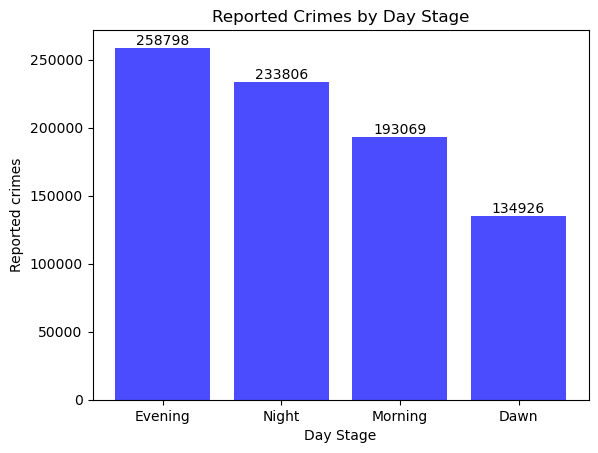

In [27]:
# Categorize time data for simplicity sake
# [0 - 6:00am --> Dawn]. [6:00am - 12:00pm --> Morning]. [12:00pm - 18:00pm --> Evening]. [18:00pm - 23:59pm --> Night]
timeBins = [0, 600, 1200, 1800, 2359]
timeNames = ['Dawn', 'Morning', 'Evening', 'Night']

# Create categories using cut method
df['Day Stage'] = pd.cut(df['TIME OCC'], bins= timeBins, labels= timeNames, include_lowest=True)
time_df = df['Day Stage'].value_counts()

# Plot Reported Crimes by Day Stage categories
time_plot = plt.bar(time_df.index, time_df.values, color = "b", alpha=0.7)
plt.title('Reported Crimes by Day Stage')
plt.xlabel('Day Stage')
plt.ylabel('Reported crimes')
plt.bar_label(time_plot)

# Save the graph to a PDF file
pdf_filename = 'CrimesByDayStage.pdf'
pdf_filepath = '../Outputs/' + pdf_filename
plt.savefig(pdf_filepath, format='pdf')

plt.show()

### b) The most dangerous areas in L.A. at Evening

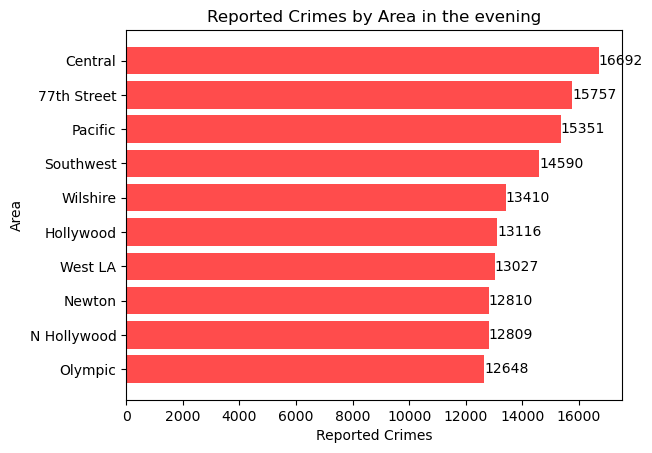

In [30]:
# Find the 10 most dangerous Areas to be at Evening as thats the time where more crimes occured
dayStage_df = df[df['Day Stage'] == 'Evening'].groupby('AREA NAME')['Day Stage'].count().sort_values().tail(10)

# Plot Reported Crimes at evening
evening_plot = plt.barh(dayStage_df.index, dayStage_df.values, color = "r", alpha=0.7)
plt.title('Reported Crimes by Area in the evening')
plt.xlabel('Reported Crimes')
plt.ylabel('Area')
plt.bar_label(evening_plot, label_type= 'edge')

# Save the graph to a PDF file
pdf_filename = 'CrimesByArea.pdf'
pdf_filepath = '../Outputs/' + pdf_filename
plt.savefig(pdf_filepath, format='pdf')

plt.show()

### c) Use Geoapify to visualize the most dangerous locations in L.A.

In [31]:
# First: According to info method, we dont have non-values in LAT & LON Columns.
# Lets check if we have 0´s. If so, we need to build another dataframe without those values.

print(df[df['LAT'] == 0]['LAT'].count())
print(df[df['LON'] == 0]['LON'].count())

11289
11289


In [113]:
# Build a new dataframe with only valid locations. Then, count how many crimes occured at that specific location.
# Finally, plot the top 10 most dangerous locations
valid_locations_df = df[(df['LAT'] != 0) & (df['LON'] != 0)]
valid_locations_df = valid_locations_df[valid_locations_df.duplicated(subset=['LAT', 'LON'], keep=False)]
valid_locations_df = valid_locations_df.groupby(['LAT', 'LON']).size().reset_index(name='REPORTED CRIMES').sort_values(by='REPORTED CRIMES', ascending=False).head(10)

In [117]:
# Look for location name in original dataset. After that, merge to retrieve this information
original_df = df[['LAT', 'LON', 'LOCATION']]
map_df = pd.merge(valid_locations_df, original_df, on=['LAT', 'LON'], how='left')
# Display only unique LAT & LON data table for preview
location_df = map_df.drop_duplicates(subset=['LAT', 'LON', 'REPORTED CRIMES'])
location_df

,LAT,LON,REPORTED CRIMES,LOCATION
0,34.0561,-118.2375,1275,800 N ALAMEDA ST
1275,34.0483,-118.2631,1072,700 S FIGUEROA ST
2347,34.2440,-118.5583,993,9300 TAMPA AV
3340,34.0611,-118.4184,928,SANTA MONICA BL
4268,34.1016,-118.3387,867,6800 HOLLYWOOD BL
5135,34.0736,-118.3563,821,100 THE GROVE DR
5956,34.0480,-118.2577,816,700 W 7TH ST
6772,34.1904,-118.6059,785,6600 TOPANGA CANYON BL
7557,34.0421,-118.2469,669,400 E 7TH ST
8226,34.0669,-118.3456,661,300 S LA BREA AV


In [118]:
# Configure the map plot
map_plot = location_df.hvplot.points(
     "LON",
     "LAT",
     geo = True,
     tiles = "CartoDark",
     size = 'REPORTED CRIMES',
     scale = 0.3,
     color = "LOCATION",
     frame_width = 700,
     frame_height = 500
 )

# Display the map
map_plot

c:\Users\IvanC\anaconda3\envs\data_bootcamp\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\IvanC\anaconda3\envs\data_bootcamp\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\IvanC\anaconda3\envs\data_bootcamp\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\IvanC\anaconda3\envs\data_bootcamp\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprec

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LON,LAT]   (LOCATION,REPORTED CRIMES)

# 3. Linear Regression

##### For this task we will use an API from https://open-meteo.com/ website to retrieve historical weather data. In this case we will use the temperature data to analyze if there is correlation between weather and crimes in LA

In [119]:
# 1. First, convert TIME OCC - Military format - to Hour format. For the API call we need just the hour as an integer
# For example, if TIME OCC is 0752, we will need only 7
df['TIME OCC'] = df['TIME OCC'].astype(str)  
df['TIME OCC'] = df['TIME OCC'].str.zfill(4) 
df['TIME OCC'] = df['TIME OCC'].str[:2] 
df['TIME OCC'] = df['TIME OCC'].astype(int)
df['TIME OCC']

0         22
1          3
2         12
3         17
4          4
          ..
820594    18
820595    10
820596    16
820597     0
820598     9
Name: TIME OCC, Length: 820599, dtype: int32

In [120]:
# 2. Convert timedate format from 'MM/DD/YYYY %h%m' to 'YYYY-MM-DD' (API Request format)
date_formats = df['DATE OCC'].apply(lambda x: re.findall(r'\d{2}/\d{2}/\d{4}', x)[0])
df['DATE OCC'] = date_formats
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y')
df['DATE OCC'] = df['DATE OCC'].dt.strftime('%Y-%m-%d')

In [134]:
# 3. Because of API calls restrictions and computing time we reduce the dataset in order to analyze just a small sample

sample = 5000 # Number of rows/crimes to analyze. If you are in a a hurry, change iloc in cell to 250. this will take aprox 3.5 minutes
df_test = df.iloc[:sample] # If the full data set is desired, remove iloc method, it will take a lot of hours due to the API
df_test_copy = df_test.copy()

In [129]:
# 4. Create API Request to retrieve Temperature at an specific time and location. Takes a long time. 

# Create a list to save temperatures 
temperatures = []

# Iterate through all dataframe
for index, df_test_copy in df_test.iterrows():
    lat = df_test_copy['LAT']
    lon = df_test_copy['LON']
    date = df_test_copy['DATE OCC']
    time = df_test_copy['TIME OCC']
    
    # Build partial query URL
    query_url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date={date}&end_date={date}&hourly=temperature_2m"
    
    response = requests.get(query_url).json()
    temperatures.append(response['hourly']['temperature_2m'][time])

# Add temperatures information to the original dataframe
df['Temperature'] = temperatures

KeyError: 'hourly'

In [73]:
# Show the first 5 rows to verify added temperature information
df_test.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Day Stage,Temperature
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,22,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,Night,16.6
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,3,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,Dawn,10.1
2,200110444,04/14/2020 12:00:00 AM,2020-02-13,12,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,Morning,5.5
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,17,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,Evening,10.1
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,4,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,Dawn,7.7


### a) Is there a correlation between Weather (temperature) and Number of Crimes?

In [74]:
# 1. WEATHER - TEMPERATURE
# Get temperature from dataframe to analyze correlation between temperature and # Crimes
temperature_data = df_test["Temperature"].round(0).value_counts()

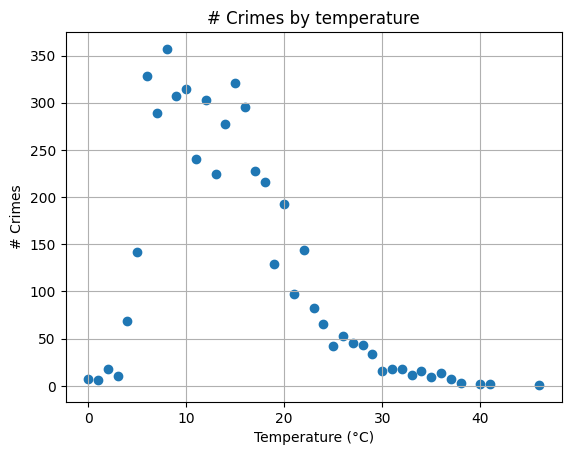

In [75]:
# Build a scatter plot for temperature data
plt.scatter(temperature_data.index, temperature_data.values, marker="o")

# Incorporate the other graph properties
plt.title('# Crimes by temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('# Crimes')
plt.grid()

# Save the graph to a PDF file
pdf_filename = 'CrimesByTemp.pdf'
pdf_filepath = '../Outputs/' + pdf_filename
plt.savefig(pdf_filepath, format='pdf')

# Show plot
plt.show()

In [76]:
# Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(temperature_data.index, temperature_data.values)
print(f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')
print(f'Correlation is: {r_value:.2f}' )

Linear Regression: y = -5.30x + 228.62
Correlation is: -0.54


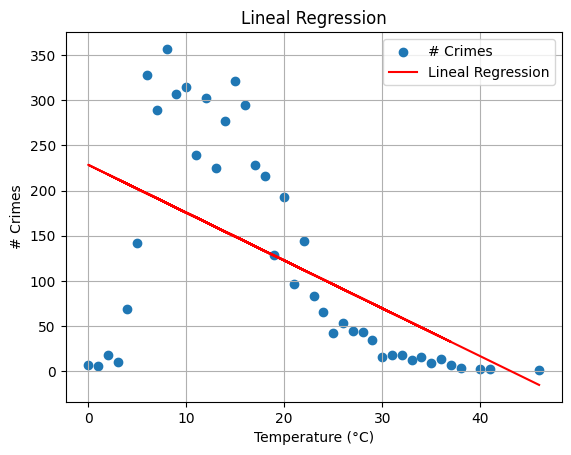

In [77]:
# Plot Linear Regression line
x = temperature_data.index
y = temperature_data.values

# Create Linear Regression line
regression_line = slope * x + intercept

# Plot data and linear regression
plt.scatter(x, y, label='# Crimes')
plt.plot(x, regression_line, color='red', label='Lineal Regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('# Crimes')
plt.legend()
plt.title('Lineal Regression')
plt.grid()

# Save the graph to a PDF file
pdf_filename = 'CrimesByTempLinReg.pdf'
pdf_filepath = '../Outputs/' + pdf_filename
plt.savefig(pdf_filepath, format='pdf')

plt.show()

### b) Is there a correlation between Time (Hour) and Number of Crimes?

In [78]:
# 2. TIME - BY HOUR
# Get time from dataframe to analyze correlation between hour and # Crimes
hour_data = df_test['TIME OCC'].value_counts()

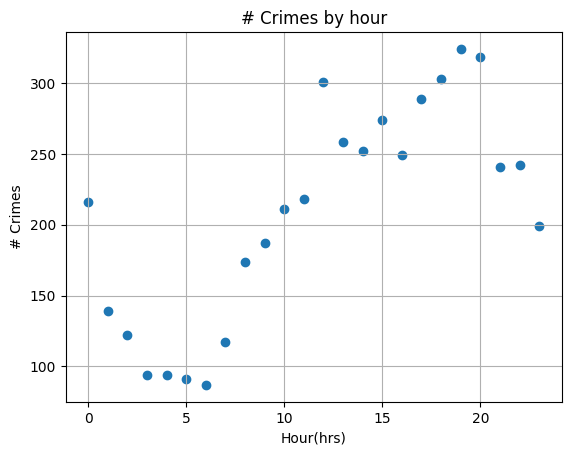

In [79]:
# Build a scatter plot for time data
plt.scatter(hour_data.index, hour_data.values, marker="o")

# Incorporate the other graph properties
plt.title('# Crimes by hour')
plt.xlabel('Hour(hrs)')
plt.ylabel('# Crimes')
plt.grid()

# Save the graph to a PDF file
pdf_filename = 'CrimesByHour.pdf'
pdf_filepath = '../Outputs/' + pdf_filename
plt.savefig(pdf_filepath, format='pdf')

# Show plot
plt.show()

In [80]:
# Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(hour_data.index, hour_data.values)
print(f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')
print(f'Correlation is: {r_value:.2f}' )

Linear Regression: y = 8.13x + 114.80
Correlation is: 0.74


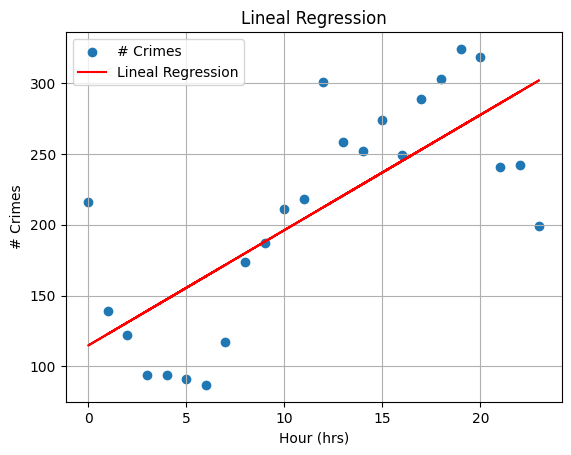

In [81]:
# Plot Linear Regression line
x = hour_data.index
y = hour_data.values

# Create Linear Regression line
regression_line = slope * x + intercept

# Plot data and linear regression
plt.scatter(x, y, label='# Crimes')
plt.plot(x, regression_line, color='red', label='Lineal Regression')
plt.xlabel('Hour (hrs)')
plt.ylabel('# Crimes')
plt.legend()
plt.title('Lineal Regression')
plt.grid()

# Save the graph to a PDF file
pdf_filename = 'CrimesByHourLinReg.pdf'
pdf_filepath = '../Outputs/' + pdf_filename
plt.savefig(pdf_filepath, format='pdf')

plt.show()